In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline


In [3]:
pwd = os.getcwd()
path = os.path.join(pwd, 'heart.csv')
df = pd.read_csv(path)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
len(df)

303

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

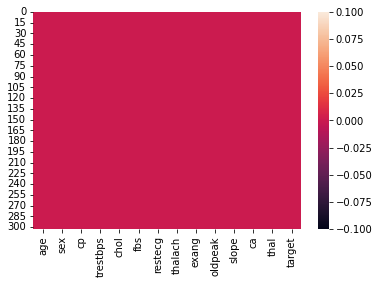

In [10]:
sns.heatmap(df.isnull())

## Understanding the data

<AxesSubplot:>

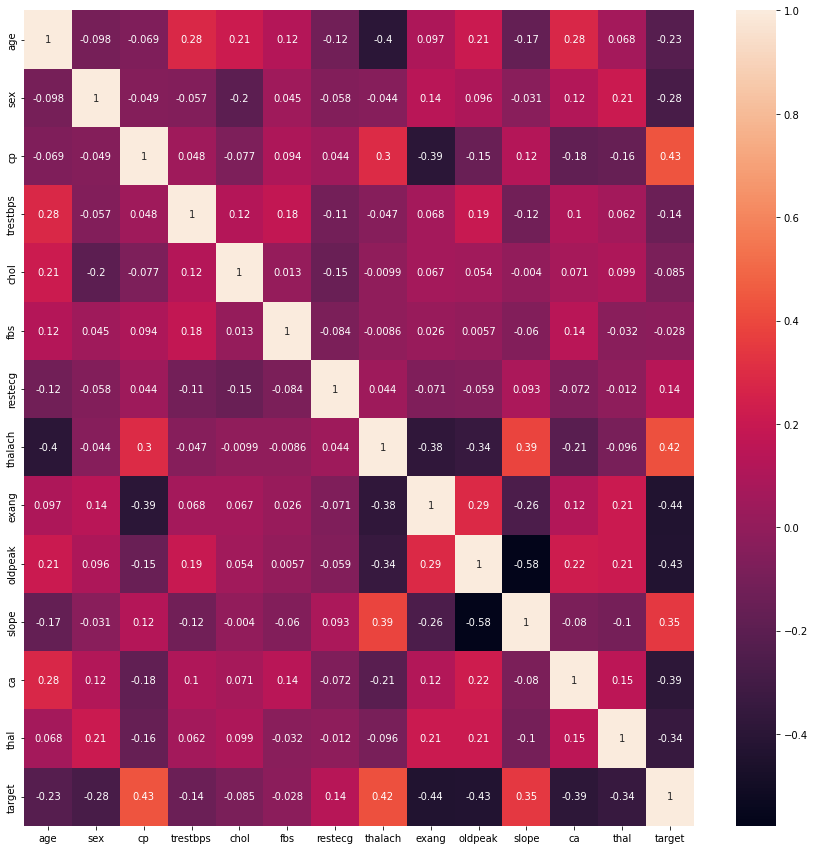

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [12]:
corr_val = df.corr()['target'].sort_values(ascending=False) 
corr_val

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

### Understanding the data and attribute types

From the below code we can deduce some attributes to be categorical in their nature and some to be numerical:

Categorical Attributes:
- Sex
- cp
- restecg
- fbs 
- exang
- ca
- target
- thal
- slope

Numerical Attributes:
- Age
- trestbps
- chol
- thalach
- oldpeak

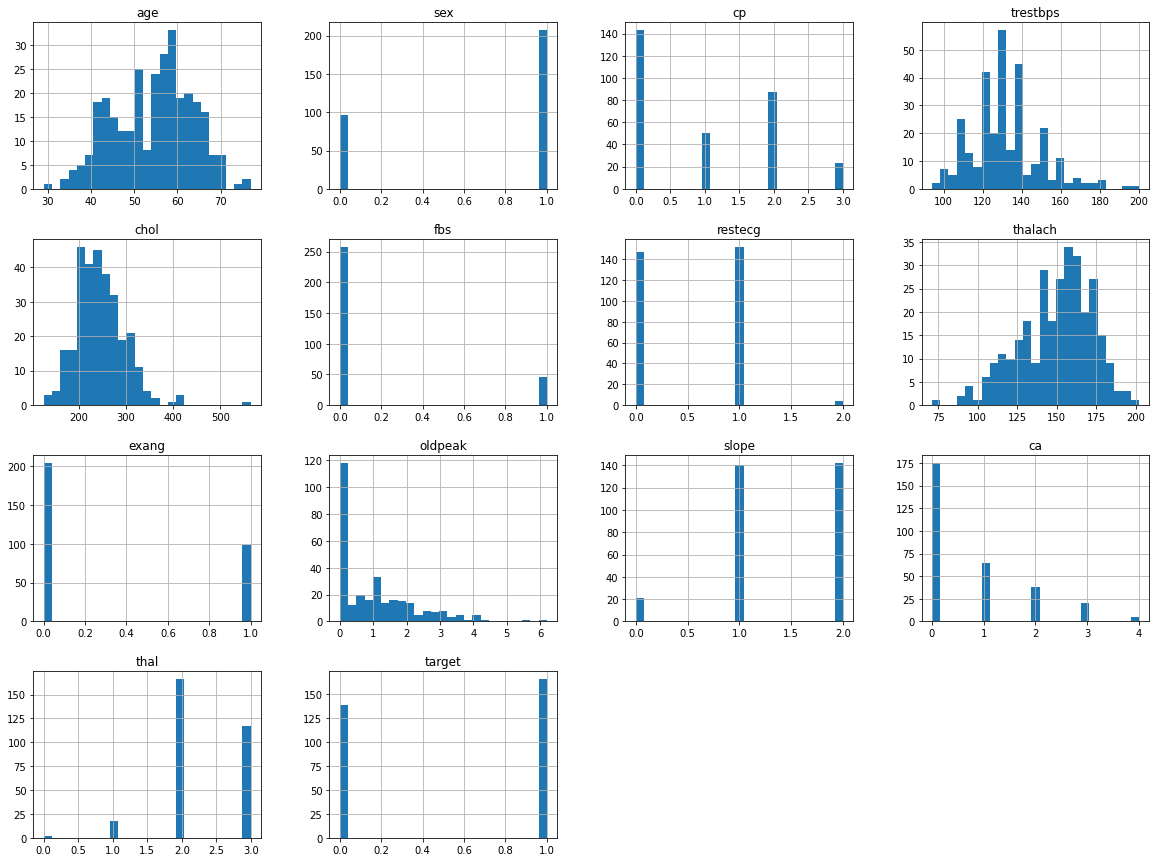

In [13]:
df.hist(bins=25, figsize=(20,15))
plt.show()

In [14]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

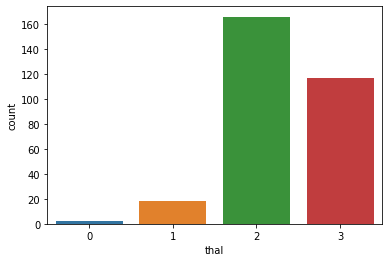

In [15]:
sns.countplot(data=df,x='thal')
#plt.xticks(ticks=[0, 1, 2, 3],labels=["Negative", 'Positive'])

In [16]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='count'>

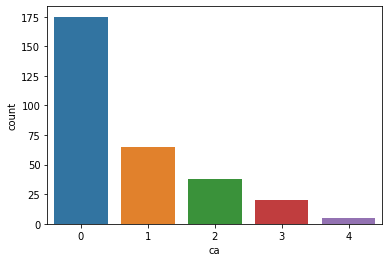

In [17]:
sns.countplot(data=df,x='ca')

In [18]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

([<matplotlib.axis.XTick at 0x206965cbb80>,
 [Text(0, 0, 'Upsloping'), Text(1, 0, 'Flat'), Text(2, 0, 'Downsloping')])

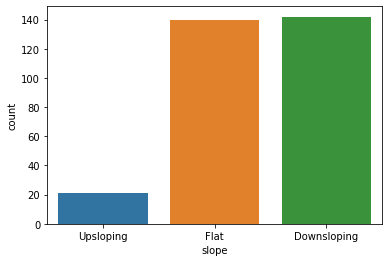

In [19]:
sns.countplot(data=df,x='slope')
plt.xticks(ticks=[0,1,2],labels=["Upsloping", 'Flat', 'Downsloping'])

In [20]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

([<matplotlib.axis.XTick at 0x20696629d60>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

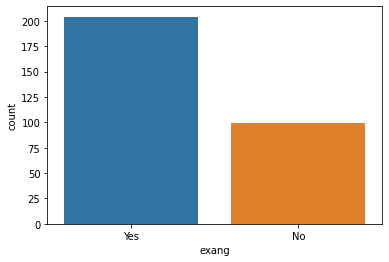

In [21]:
sns.countplot(data=df,x='exang')
plt.xticks(ticks=[0,1],labels=["Yes", 'No'])

In [22]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

([<matplotlib.axis.XTick at 0x206966856a0>,
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'ST-T Wave Abnormality'),
  Text(2, 0, 'Probable/Definite Left Ventricular Hypertrophy')])

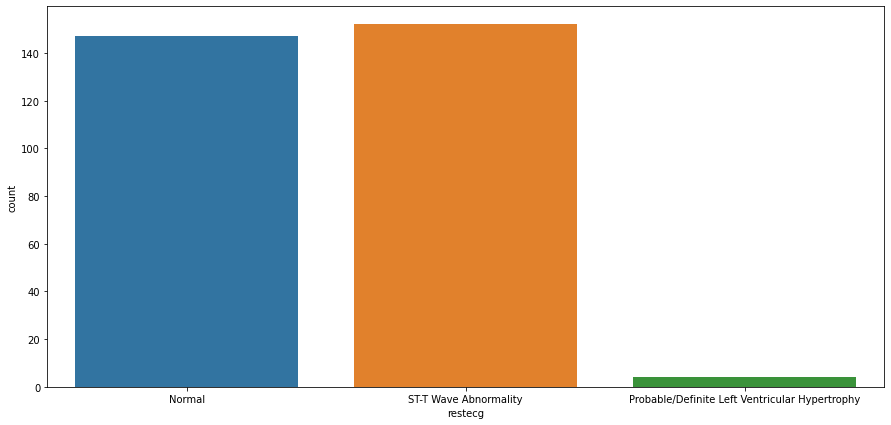

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='restecg')
plt.xticks(ticks=[0,1,2],labels=["Normal", 'ST-T Wave Abnormality', 'Probable/Definite Left Ventricular Hypertrophy'])

In [24]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

([<matplotlib.axis.XTick at 0x20696901670>,
 [Text(0, 0, 'True'), Text(1, 0, 'False')])

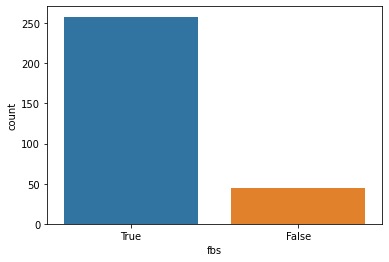

In [25]:
sns.countplot(data=df,x='fbs')
plt.xticks(ticks=[0,1],labels=["True", 'False'])

In [26]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

([<matplotlib.axis.XTick at 0x206966f4c10>,
 [Text(0, 0, 'Typical Angina'),
  Text(1, 0, 'Atypical Angina'),
  Text(2, 0, 'Non-anginal pain'),
  Text(3, 0, 'Asymptomatic')])

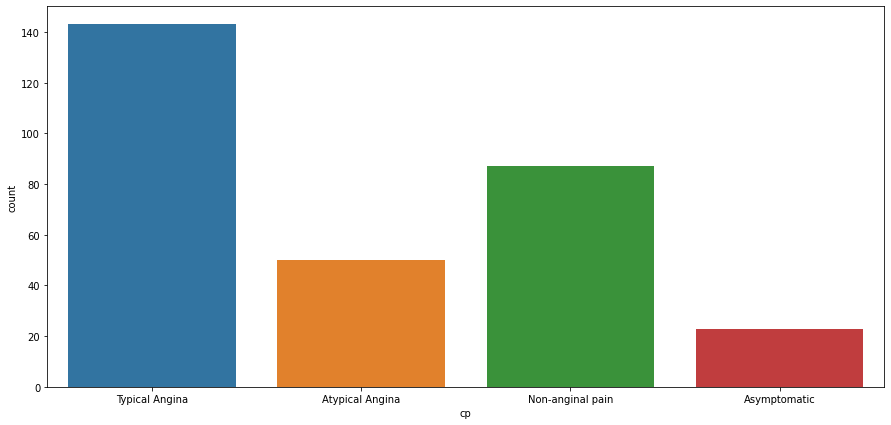

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='cp')
plt.xticks(ticks=[0, 1, 2, 3],labels=["Typical Angina", 'Atypical Angina', 'Non-anginal pain', 'Asymptomatic'])

In [28]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

([<matplotlib.axis.XTick at 0x20696ac3f70>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

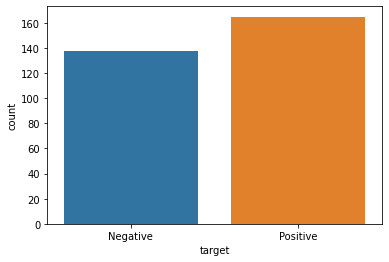

In [29]:
sns.countplot(data=df,x='target')
plt.xticks(ticks=[0,1],labels=["Negative", 'Positive'])

In [30]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x20696b23100>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

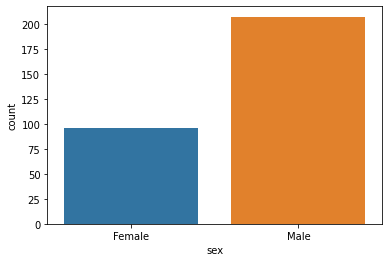

In [31]:
sns.countplot(data=df,x='sex')
plt.xticks(ticks=[0,1],labels=["Female", 'Male'])

In [32]:
# How many people have had and not had heart disease
percentage_that_dont_have = 100*(len(df[df['target'] == 0])/len(df))
percentage_that_have = 100*(len(df[df['target'] == 1])/len(df))
print('Amount of people that dont have heart disease: ', percentage_that_dont_have, "%")
print('Amount of people that do have heart disease: ', percentage_that_have, "%")


Amount of people that dont have heart disease:  45.54455445544555 %
Amount of people that do have heart disease:  54.45544554455446 %


## Analysing different relationships between different features

In [33]:
df_cat = ['sex', 'cp', 'restecg', 'fbs', 'exang', 'ca', 'target', 'thal', 'slope']
df_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = df[df_cat]
numerical = df[df_num]

### Categorical

We will explore the possible relationships that seemingly have the highest correlations

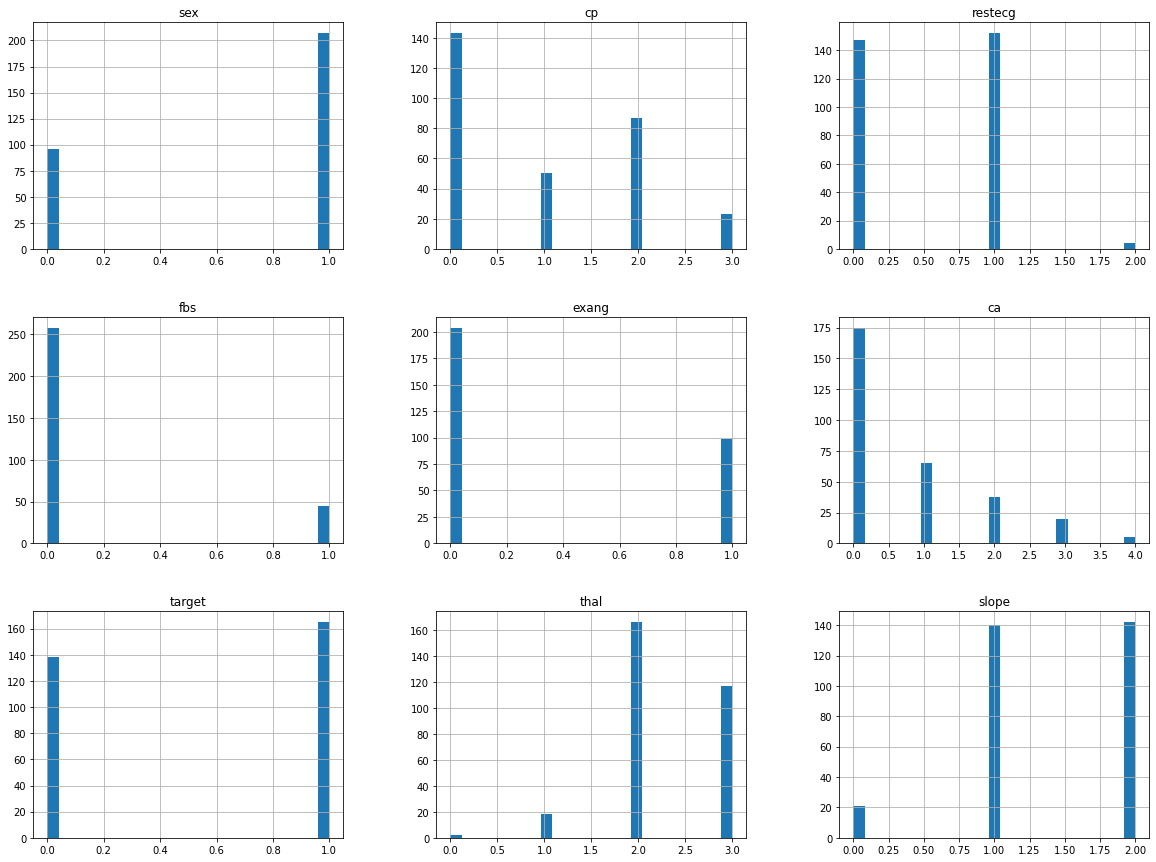

In [34]:
categorical.hist(bins=25, figsize=(20,15))
plt.show()

<AxesSubplot:>

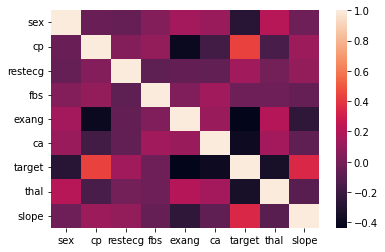

In [35]:
sns.heatmap(categorical.corr())

In [36]:
categorical.columns

Index(['sex', 'cp', 'restecg', 'fbs', 'exang', 'ca', 'target', 'thal',
       'slope'],
      dtype='object')

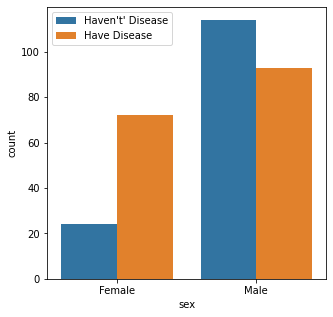

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(data=categorical,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Haven't' Disease", 'Have Disease'])

([<matplotlib.axis.XTick at 0x2069842f5e0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

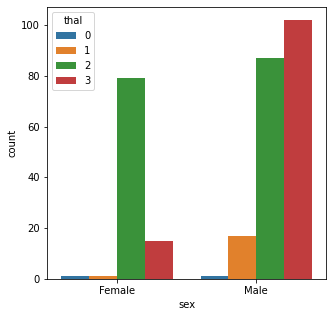

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(data=categorical,x='sex',hue='thal')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
# plt.legend(["Haven't' Disease", 'Have Disease'])

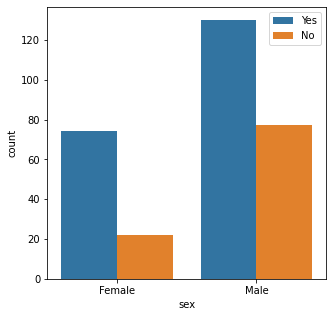

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='sex',hue='exang')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Yes", 'No'])

([<matplotlib.axis.XTick at 0x20695b26340>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

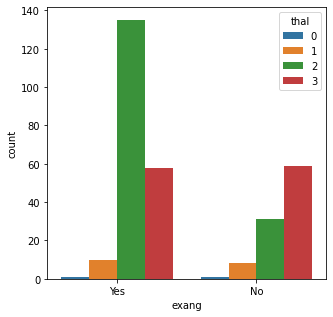

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(data=categorical,x='exang',hue='thal')
plt.xticks(ticks = [0,1], labels = ['Yes','No'])
# plt.legend(["", 'Have Disease'])

### Numerical

<AxesSubplot:>

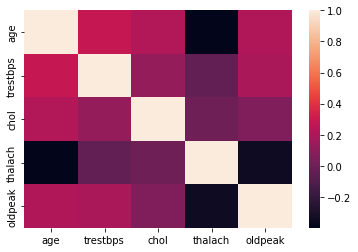

In [41]:
sns.heatmap(numerical.corr())

In [42]:
df.plot.scatter

<bound method PlotAccessor.scatter of <pandas.plotting._core.PlotAccessor object at 0x000002069624B820>>

<AxesSubplot:xlabel='age', ylabel='oldpeak'>

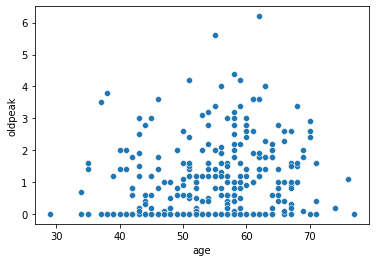

In [43]:
sns.scatterplot(data=numerical, x='age', y='oldpeak')

<AxesSubplot:xlabel='age', ylabel='trestbps'>

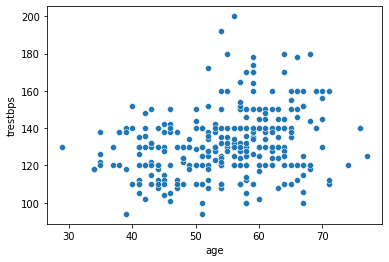

In [44]:
sns.scatterplot(data=numerical, x="age",y="trestbps")

<AxesSubplot:xlabel='age', ylabel='chol'>

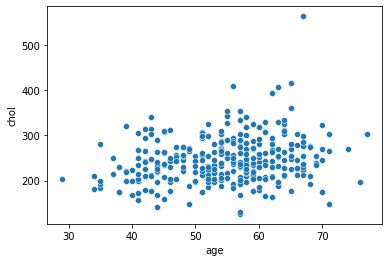

In [45]:
sns.scatterplot(data=numerical, x="age",y="chol")

<AxesSubplot:xlabel='trestbps', ylabel='chol'>

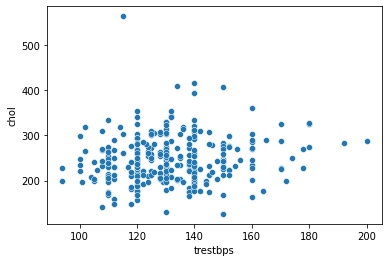

In [46]:
sns.scatterplot(data=numerical, y="chol",x="trestbps")

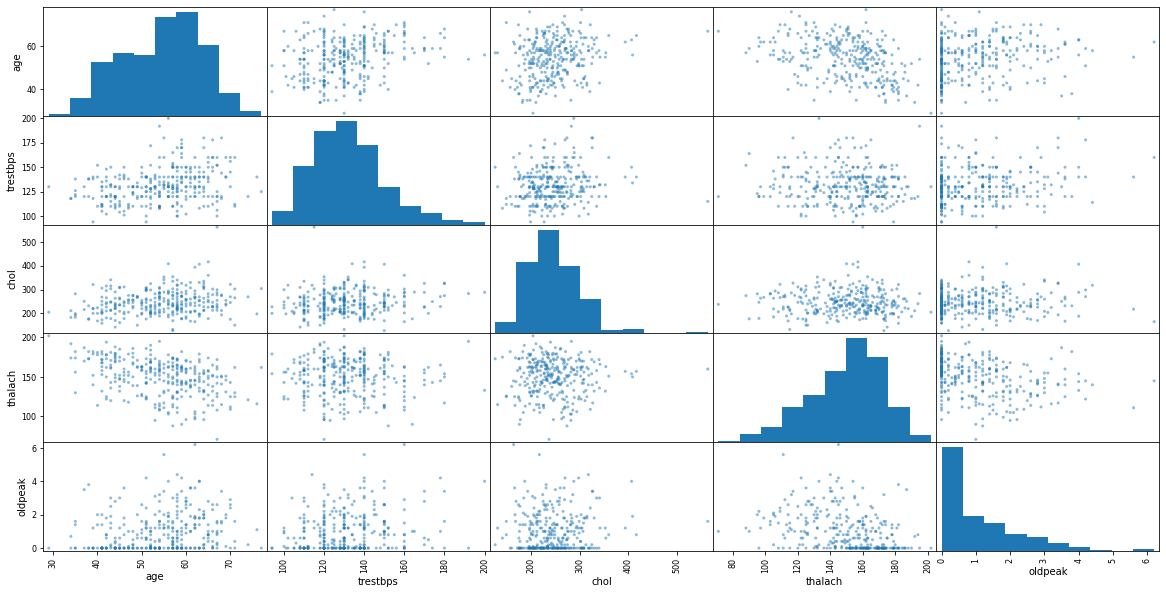

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   trestbps  303 non-null    int64  
 2   chol      303 non-null    int64  
 3   thalach   303 non-null    int64  
 4   oldpeak   303 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 12.0 KB


In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(numerical, figsize=(20, 10))
plt.show()
numerical.info()

# Data Preparation

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
target_value = df['target']
target_value

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [50]:
#replacing the categorical names from numbers to words 
df.target = df['target'].map({0:'Positive', 1:'Negative'})

In [51]:
y = df['target']
y

0      Negative
1      Negative
2      Negative
3      Negative
4      Negative
         ...   
298    Positive
299    Positive
300    Positive
301    Positive
302    Positive
Name: target, Length: 303, dtype: object

In [52]:
y.shape

(303,)

In [53]:
X = df.drop(['target'], axis=1)
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [54]:
X.thal

0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3
301    3
302    2
Name: thal, Length: 303, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [56]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))

X_train shape: (227, 13)
y_train shape: (227,)


In [57]:
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_test shape: (76, 13)
y_test shape: (76,)


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_trained = scaler.fit_transform(X_train)
scaled_X_trained

array([[ 0.26745345,  0.71647284, -0.0127744 , ...,  0.97351831,
         0.30327986, -0.53044521],
       [ 0.4831264 ,  0.71647284,  0.95382211, ..., -0.6634347 ,
         0.30327986, -2.20282109],
       [ 1.34581817,  0.71647284, -0.97937092, ..., -0.6634347 ,
         1.30102663,  1.14193067],
       ...,
       [ 1.56149112,  0.71647284,  1.92041862, ..., -0.6634347 ,
         0.30327986, -0.53044521],
       [-0.91874774,  0.71647284, -0.97937092, ...,  0.97351831,
        -0.69446692,  1.14193067],
       [ 0.91447229, -1.39572632, -0.0127744 , ...,  0.97351831,
         1.30102663, -0.53044521]])

In [59]:
scaled_X_test = scaler.transform(X_test)
scaled_X_trained

array([[ 0.26745345,  0.71647284, -0.0127744 , ...,  0.97351831,
         0.30327986, -0.53044521],
       [ 0.4831264 ,  0.71647284,  0.95382211, ..., -0.6634347 ,
         0.30327986, -2.20282109],
       [ 1.34581817,  0.71647284, -0.97937092, ..., -0.6634347 ,
         1.30102663,  1.14193067],
       ...,
       [ 1.56149112,  0.71647284,  1.92041862, ..., -0.6634347 ,
         0.30327986, -0.53044521],
       [-0.91874774,  0.71647284, -0.97937092, ...,  0.97351831,
        -0.69446692,  1.14193067],
       [ 0.91447229, -1.39572632, -0.0127744 , ...,  0.97351831,
         1.30102663, -0.53044521]])

In [60]:
def preprocessing_function(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    scaled_X_trained = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    return scaled_X_trained, scaled_X_test, y_train, y_test
    

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(scaled_X_trained, y_train).predict(scaled_X_test)


In [62]:
print("Test set predictions:\n", y_pred) # print out the predictions for the test data 

Test set predictions:
 ['Positive' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Negative' 'Positive' 'Positive' 'Negative' 'Negative' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Positive' 'Negative'
 'Negative' 'Negative' 'Negative' 'Positive' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Positive' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Negative'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Positive' 'Negative' 'Positive' 'Negative']


In [63]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 76 points : 9


In [64]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)

In [65]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
#plt.matshow(conf_matrix)

array([[36,  5],
       [ 4, 31]], dtype=int64)

In [66]:
sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', 100*sensitivity )

specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', 100*specificity)

Sensitivity :  90.0
Specificity :  86.11111111111111


<AxesSubplot:>

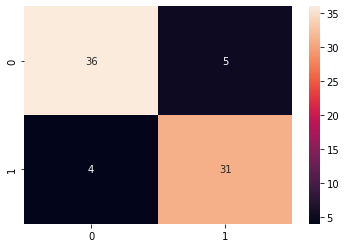

In [67]:
sns.heatmap(conf_matrix, annot = True)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.78       124
    Positive       0.74      0.71      0.73       103

    accuracy                           0.76       227
   macro avg       0.76      0.75      0.75       227
weighted avg       0.76      0.76      0.76       227



In [1]:
from sklearn.metrics import auc, precision_score, recall_score, accuracy_score, f1_score, roc_curve, precision_recall_curve
print("With all 14 columns:")
print('Precision Score: ', 100*precision_score(y_train, y_train_pred, pos_label='Positive')) 
print('Recall Score: ', 100*recall_score(y_train, y_train_pred, pos_label='Positive')) 
print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
print('F1 Score: ', 100*f1_score(y_train, y_train_pred, pos_label='Positive'))

fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,0], pos_label='Negative')
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
print('AUC: ',auc(fpr,tpr))
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,1], pos_label='Positive')
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
print('AUC: ', auc(fpr,tpr))


With all 14 columns:


NameError: name 'y_train' is not defined

In [ ]:
print(corr_val)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [ ]:
high_corr_attributes = ['cp', 'thalach', 'slope', 'restecg', 'age', 'sex', 'exang', 'oldpeak', 'ca', 'thal']
high_corr_df = df[high_corr_attributes]
high_corr_df

,cp,thalach,slope,restecg,age,sex,exang,oldpeak,ca,thal
0,3,150,0,0,63,1,0,2.3,0,1
1,2,187,0,1,37,1,0,3.5,0,2
2,1,172,2,0,41,0,0,1.4,0,2
3,1,178,2,1,56,1,0,0.8,0,2
4,0,163,2,1,57,0,1,0.6,0,2
...,...,...,...,...,...,...,...,...,...,...
298,0,123,1,1,57,0,1,0.2,0,3
299,3,132,1,1,45,1,0,1.2,0,3
300,0,141,1,1,68,1,0,3.4,2,3
301,0,115,1,1,57,1,1,1.2,1,3


In [ ]:
def NB_alg(scaled_X_trained, scaled_X_test, y_train):
    y_pred = gnb.fit(scaled_X_trained, y_train).predict(scaled_X_test)

    y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)

    conf_matrix = confusion_matrix(y_test, y_pred)

    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity : ', 100*sensitivity )

    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity : ', 100*specificity)
    

    sns.heatmap(conf_matrix, annot = True)

    print('Precision Score: ', 100*precision_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Recall Score: ', 100*recall_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('F1 Score: ', 100*f1_score(y_train, y_train_pred, pos_label='Positive'))



Sensitivity :  90.2439024390244
Specificity :  88.57142857142857
Precision Score:  74.48979591836735
Recall Score:  70.87378640776699
Accuracy Score:  75.77092511013215
F1 Score:  72.63681592039802


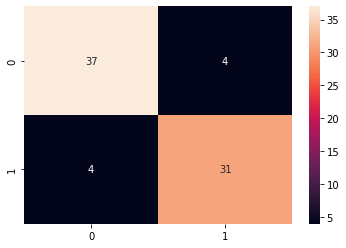

In [ ]:
pre = preprocessing_function(high_corr_df, y)
NB_alg(pre[0], pre[1], pre[2])

## Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_alg(scaled_X_trained, scaled_X_test, y_train):
    knn = KNeighborsClassifier(n_neighbors = 5)
    y_pred = knn.fit(scaled_X_trained, y_train).predict(scaled_X_test)

    y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)

    conf_matrix = confusion_matrix(y_test, y_pred)

    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity : ', 100*sensitivity )

    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity : ', 100*specificity)

    sns.heatmap(conf_matrix, annot = True)

    print('Precision Score: ', 100*precision_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Recall Score: ', 100*recall_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('F1 Score: ', 100*f1_score(y_train, y_train_pred, pos_label='Positive'))

Sensitivity :  87.5
Specificity :  83.33333333333334
Precision Score:  74.48979591836735
Recall Score:  70.87378640776699
Accuracy Score:  75.77092511013215
F1 Score:  72.63681592039802


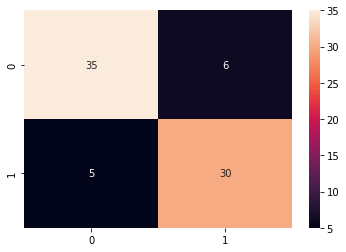

In [ ]:
pre = preprocessing_function(high_corr_df, y)
KNN_alg(pre[0], pre[1], pre[2])

Sensitivity :  90.0
Specificity :  86.11111111111111
Precision Score:  74.48979591836735
Recall Score:  70.87378640776699
Accuracy Score:  75.77092511013215
F1 Score:  72.63681592039802


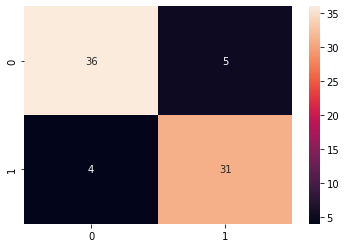

In [ ]:
KNN_alg(scaled_X_trained, scaled_X_test, y_train)

## Using SVC

In [ ]:
from sklearn.svm import SVC
def svc_alg(scaled_X_trained, scaled_X_test, y_train):
    svc = SVC(random_state = 1)
    y_pred = svc.fit(scaled_X_trained, y_train).predict(scaled_X_test)

    y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)

    conf_matrix = confusion_matrix(y_test, y_pred)

    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity : ', 100*sensitivity )

    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity : ', 100*specificity)

    sns.heatmap(conf_matrix, annot = True)

    print('Precision Score: ', 100*precision_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Recall Score: ', 100*recall_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('F1 Score: ', 100*f1_score(y_train, y_train_pred, pos_label='Positive'))



Sensitivity :  88.09523809523809
Specificity :  88.23529411764706
Precision Score:  74.48979591836735
Recall Score:  70.87378640776699
Accuracy Score:  75.77092511013215
F1 Score:  72.63681592039802


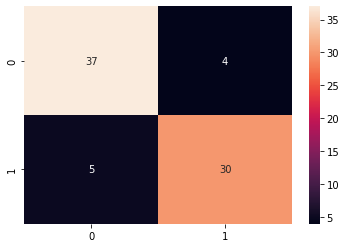

In [ ]:
svc_alg(pre[0], pre[1], pre[2])

Sensitivity :  88.09523809523809
Specificity :  88.23529411764706
Precision Score:  74.48979591836735
Recall Score:  70.87378640776699
Accuracy Score:  75.77092511013215
F1 Score:  72.63681592039802


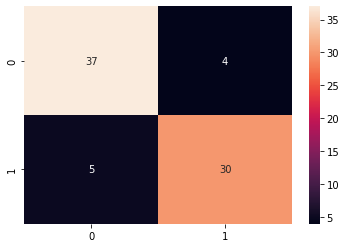

In [ ]:
svc_alg(scaled_X_trained, scaled_X_test, y_train)

## Using a Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def dtc_alg(scaled_X_trained, scaled_X_test, y_train):
    dtc = DecisionTreeClassifier()
    y_pred = dtc.fit(scaled_X_trained, y_train).predict(scaled_X_test)

    y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)

    conf_matrix = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(conf_matrix, annot = True)

    print('Precision Score: ', 100*precision_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Recall Score: ', 100*recall_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('F1 Score: ', 100*f1_score(y_train, y_train_pred, pos_label='Positive'))

Precision Score:  74.48979591836735
Recall Score:  70.87378640776699
Accuracy Score:  75.77092511013215
F1 Score:  72.63681592039802


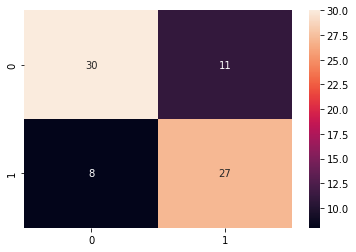

In [ ]:
dtc_alg(pre[0], pre[1], pre[2])

Precision Score:  74.48979591836735
Recall Score:  70.87378640776699
Accuracy Score:  75.77092511013215
F1 Score:  72.63681592039802


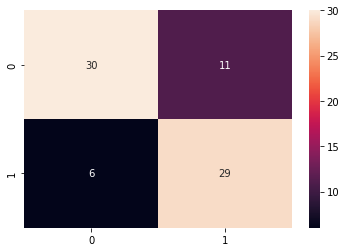

In [ ]:
dtc_alg(scaled_X_trained, scaled_X_test, y_train)